In [82]:
 import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning 
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()
# Maths
import math

# Set the options
pd.set_option('display.max_rows',24)
pd.set_option('display.max_columns',500)
%matplotlib inline 




In [138]:
#import dataset containing features earlier selected based on importance 
df2=pd.read_csv('Birdstrikesml.csv')

In [139]:
df2.head()

,Unnamed: 0,RISK,FAAREGION,AIRPORT,AIRCRAFT,DAMAGE_LEVEL,SIZE,INCIDENT_YEAR,INCIDENT_DATE,WARNED,PHASE_OF_FLIGHT,HEIGHT,TYPE_ENG,INDICATED_DAMAGE,EFFECT,NUM_ENGS,ENG_1_POS
0,1,Undetermined,ASW,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,B-727,N,Medium,1993,1993-01-08,Unknown,Landing Roll,0.0,D,False,None,3.0,5.0
1,2,Undetermined,AGL,CHICAGO O'HARE INTL ARPT,B-757-200,N,Small,1996,1996-08-18,Unknown,Landing Roll,0.0,D,False,None,2.0,1.0
2,3,High Risk,ANE,MANCHESTER AIRPORT,BE-33,S,Large,1993,1993-09-19,No,Approach,1800.0,A,True,Precautionary Landing,1.0,7.0
3,4,Low Risk,ASW,EL PASO INTL ARPT,B-727,N,Small,1991,1991-03-23,No,Approach,200.0,D,False,None,3.0,5.0
4,17,Low Risk,AGL,GOSHEN MUNICIPAL ARPT,PA-31T CHEYENNE,N,Small,1990,1990-08-23,No,Approach,300.0,C,False,None,2.0,4.0


In [149]:
df2['NUM_ENGS'].dtype

dtype('float64')

In [85]:
df2['INCIDENT_DATE']=pd.to_datetime(df2['INCIDENT_DATE'])

In [86]:
#FURTHER PREPROCESSING 
df2['INCIDENT_DAY']=df2['INCIDENT_DATE'].dt.day
df2['INCIDENT_MONTH']=df2['INCIDENT_DATE'].dt.month

In [87]:
df2.drop('INCIDENT_DATE',axis=1,inplace=True)

In [88]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

# SCALING AND ENCODING

In [95]:
#SPLITING 

X=df2.drop('INDICATED_DAMAGE',axis=1) #assign the all features to X
y=df2['INDICATED_DAMAGE'] #assign the target to y variable

In [96]:
# ENCODING
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder =OrdinalEncoder()
X=ordinal_encoder.fit_transform(X)

In [97]:
filehandler= open('Encoda.obj', 'wb')
pickle.dump(ordinal_encoder, filehandler)
filehandler.close()

In [98]:
scaler= StandardScaler()

In [99]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=123)

In [100]:
# Fit to X rtrain only
scaler.fit(X_train)

StandardScaler()

# selecting features using importance

In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)
imp=pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
imp
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

KeyboardInterrupt: 

In [ ]:
imp[imp['Importance']>0.01].sort_values(by='Importance',ascending=False)

In [11]:
X.shape

(136131, 16)

In [12]:
X

array([[  3.,   7., 941., ...,   5.,   7.,   0.],
       [  3.,   3., 265., ...,   0.,  17.,   7.],
       [  0.,   4., 978., ...,   7.,  18.,   8.],
       ...,
       [  3.,   4., 889., ...,   2.,  29.,   9.],
       [  3.,   2., 905., ...,   0.,  30.,   9.],
       [  3.,   7., 570., ...,   2.,  10.,   3.]])

In [13]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=123)

In [14]:
# Fit to X rtrain only
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# MACHINE LEARNING

In [101]:
def model_to_use(input_ml_algo):
    if input_ml_algo=='DT':
        model = DecisionTreeClassifier()
    if input_ml_algo=='RF':
        model= RandomForestClassifier()
    if input_ml_algo=='XGBC':
        model=XGBClassifier()
    if input_ml_algo=='LGBMC':
        model=LGBMClassifier()
    if input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [102]:
# LOGISTIC REGRESSION
model=model_to_use('LR')
model

LogisticRegression()

In [103]:
#Training the model
model.fit(X_train, y_train)
model

C:\Users\FMC OWO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
 y_pred = model.predict(X_test)

# predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[0] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted: ',y_pred_prod[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted:  [0.9931829103288612, 0.9987761272330413, 0.9968811337011559, 0.9787668992549711, 0.9962395989477695]



 Accuracy Score : 
 0.9555827619980412

 AUC Score : 
 0.7018678133093702

 Confusion Matrix: 
 [[37960   288]
 [ 1526  1066]]

 Classification Report : 
               precision    recall  f1-score   support

       False       0.96      0.99      0.98     38248
        True       0.79      0.41      0.54      2592

    accuracy                           0.96     40840
   macro avg       0.87      0.70      0.76     40840
weighted avg       0.95      0.96      0.95     40840


 ROC Curve : 



C:\Users\FMC OWO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


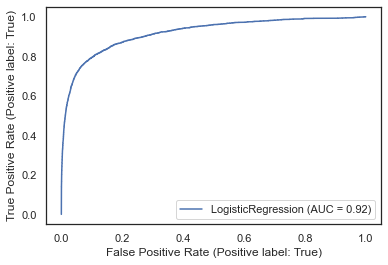

In [105]:
def compute_evaluation_metric(model,x_test, y_actual, y_predicted, y_predicted_prob):
    print('\n Accuracy Score : \n',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n', roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix: \n', confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n',classification_report(y_actual,y_predicted))
     
    print('\n ROC Curve : \n')
    sns.set_style('white')
    plot_roc_curve(model, x_test, y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test, y_test, y_pred, y_pred_prod)

In [106]:
# DECISION TREE CLASSIFIER
model=model_to_use('DT')
model

DecisionTreeClassifier()

In [107]:
model.fit(X_train, y_train)
model

DecisionTreeClassifier()

In [108]:
 y_pred = model.predict(X_test)

# predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[0] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted: ',y_pred_prod[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted:  [1.0, 1.0, 1.0, 1.0, 1.0]



 Accuracy Score : 
 0.9996571988246817

 AUC Score : 
 0.9987380119609256

 Confusion Matrix: 
 [[38240     8]
 [    6  2586]]

 Classification Report : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     38248
        True       1.00      1.00      1.00      2592

    accuracy                           1.00     40840
   macro avg       1.00      1.00      1.00     40840
weighted avg       1.00      1.00      1.00     40840


 ROC Curve : 



C:\Users\FMC OWO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


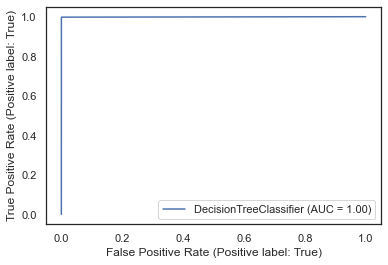

In [109]:
def compute_evaluation_metric(model,x_test, y_actual, y_predicted, y_predicted_prob):
    print('\n Accuracy Score : \n',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n', roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix: \n', confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n',classification_report(y_actual,y_predicted))
     
    print('\n ROC Curve : \n')
    sns.set_style('white')
    plot_roc_curve(model, x_test, y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test, y_test, y_pred, y_pred_prod)

In [110]:
# RANDOM FOREST
model=model_to_use('RF')
model

RandomForestClassifier()

In [111]:
model.fit(X_train, y_train)
model

RandomForestClassifier()

In [112]:
y_pred = model.predict(X_test)
# predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted: ',y_pred_prod[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted:  [0.0, 0.0, 0.0, 0.0, 0.0]



 Accuracy Score : 
 0.9998530852105779

 AUC Score : 
 0.9988425925925926

 Confusion Matrix: 
 [[38248     0]
 [    6  2586]]

 Classification Report : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     38248
        True       1.00      1.00      1.00      2592

    accuracy                           1.00     40840
   macro avg       1.00      1.00      1.00     40840
weighted avg       1.00      1.00      1.00     40840


 ROC Curve : 



C:\Users\FMC OWO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


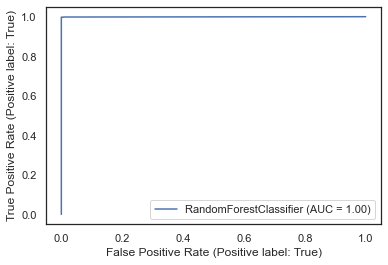

In [113]:
def compute_evaluation_metric(model,x_test, y_actual, y_predicted, y_predicted_prob):
    print('\n Accuracy Score : \n',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n', roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix: \n', confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n',classification_report(y_actual,y_predicted))
     
    print('\n ROC Curve : \n')
    sns.set_style('white')
    plot_roc_curve(model, x_test, y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test, y_test, y_pred, y_pred_prod)

In [114]:
#XGBC CLASSIFIER
model=model_to_use('XGBC')
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [115]:
model.fit(X_train, y_train)
model

C:\Users\FMC OWO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
 y_pred = model.predict(X_test)

# predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[0] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted: ',y_pred_prod[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted:  [0.9999946, 0.9999994, 0.9999994, 0.9999927, 0.9999914]



 Accuracy Score : 
 0.9998530852105779

 AUC Score : 
 0.9988425925925926

 Confusion Matrix: 
 [[38248     0]
 [    6  2586]]

 Classification Report : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     38248
        True       1.00      1.00      1.00      2592

    accuracy                           1.00     40840
   macro avg       1.00      1.00      1.00     40840
weighted avg       1.00      1.00      1.00     40840


 ROC Curve : 



C:\Users\FMC OWO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


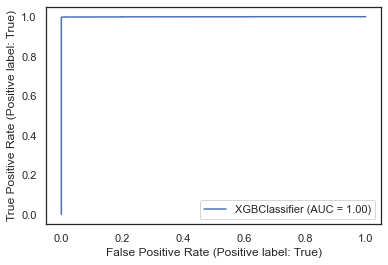

In [117]:
def compute_evaluation_metric(model,x_test, y_actual, y_predicted, y_predicted_prob):
    print('\n Accuracy Score : \n',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n', roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix: \n', confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n',classification_report(y_actual,y_predicted))
     
    print('\n ROC Curve : \n')
    sns.set_style('white')
    plot_roc_curve(model, x_test, y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test, y_test, y_pred, y_pred_prod)

In [118]:
#LGBMC
model=model_to_use('LGBMC')
model

LGBMClassifier()

In [119]:
model.fit(X_train, y_train)
model

LGBMClassifier()

In [120]:
 y_pred = model.predict(X_test)

# predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[0] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted: ',y_pred_prod[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted:  [0.9999968109643786, 0.9999966836566807, 0.9999971554225024, 0.9999946602613967, 0.9999971554298958]



 Accuracy Score : 
 0.9998285994123408

 AUC Score : 
 0.9988295200136342

 Confusion Matrix: 
 [[38247     1]
 [    6  2586]]

 Classification Report : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     38248
        True       1.00      1.00      1.00      2592

    accuracy                           1.00     40840
   macro avg       1.00      1.00      1.00     40840
weighted avg       1.00      1.00      1.00     40840


 ROC Curve : 



C:\Users\FMC OWO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


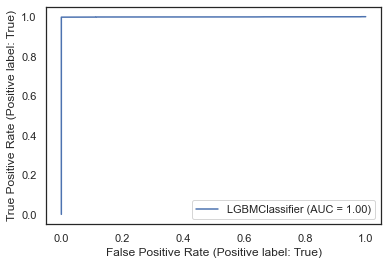

In [121]:
def compute_evaluation_metric(model,x_test, y_actual, y_predicted, y_predicted_prob):
    print('\n Accuracy Score : \n',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n', roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix: \n', confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n',classification_report(y_actual,y_predicted))
     
    print('\n ROC Curve : \n')
    sns.set_style('white')
    plot_roc_curve(model, x_test, y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test, y_test, y_pred, y_pred_prod)

# HANDLING IMBALANCE 

In [122]:
ros=RandomOverSampler()

In [123]:
X_ros, y_ros = ros.fit_resample(X,y)
y_ros.value_counts()

True     127622
False    127622
Name: INDICATED_DAMAGE, dtype: int64

In [124]:
X=X_ros
y=y_ros

In [125]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=123)


In [126]:
scaler.fit(X_train)

StandardScaler()

In [127]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [128]:
def model_to_use(input_ml_algo):
    if input_ml_algo=='DT':
        model = DecisionTreeClassifier()
    if input_ml_algo=='RF':
        model= RandomForestClassifier()
    if input_ml_algo=='XGBC':
        model=XGBClassifier()
    if input_ml_algo=='LGBMC':
        model=LGBMClassifier()
    if input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [129]:
model=model_to_use('XGBC')
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [130]:
model.fit(X_train, y_train)
model

C:\Users\FMC OWO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
 y_pred = model.predict(X_test)

# predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[0] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted: ',y_pred_prod[:5])

Y predicted :  [False  True  True ...  True False False]
Y probability predicted:  [0.9999965, 1.7881393e-06, 2.7179718e-05, 4.7683716e-06, 0.9999769]



 Accuracy Score : 
 1.0

 AUC Score : 
 1.0

 Confusion Matrix: 
 [[38358     0]
 [    0 38216]]

 Classification Report : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     38358
        True       1.00      1.00      1.00     38216

    accuracy                           1.00     76574
   macro avg       1.00      1.00      1.00     76574
weighted avg       1.00      1.00      1.00     76574


 ROC Curve : 



C:\Users\FMC OWO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


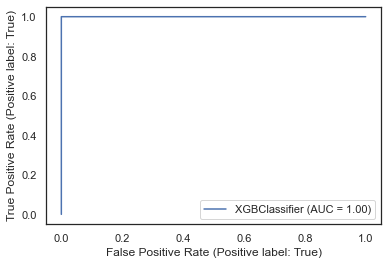

In [133]:
def compute_evaluation_metric(model,x_test, y_actual, y_predicted, y_predicted_prob):
    print('\n Accuracy Score : \n',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n', roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix: \n', confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n',classification_report(y_actual,y_predicted))
     
    print('\n ROC Curve : \n')
    sns.set_style('white')
    plot_roc_curve(model, x_test, y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test, y_test, y_pred, y_pred_prod)

In [134]:
import pickle 

In [135]:
pickle.dump(model,open('birdy.pkl', 'wb'))
pickle.dump(scaler, open('tweeny.pkl', 'wb'))

# STREAMLIT

In [154]:
%%writefile raven.py

import streamlit as st 
import pandas as pd
import numpy as np
import pickle
from PIL import Image 


st.write(""" 
# RAVEN: AIRCRAFT INDICATED DAMAGE PREDICTION APP!
""")
image=Image.open('birdstrike.jpg')
st.image(image, caption='Aircraft/Avian Hazard')
model = pickle.load(open('birdy.pkl', 'rb'))
scaler=pickle.load(open('tweeny.pkl', 'rb'))
enc_loaded=pickle.load(open('Encoda.obj','rb'))
df2= pd.read_csv('Birdstrikesml.csv', low_memory=False)

Risks=df2['RISK'].unique().tolist()
Faaregion=df2['FAAREGION'].unique().tolist()
Airport=df2['AIRPORT'].unique().tolist()
Aircraft=df2['AIRCRAFT'].unique().tolist()
Damage_level=df2['DAMAGE_LEVEL'].unique().tolist() 
Size=df2['SIZE'].unique().tolist()
Warned=df2['WARNED'].unique().tolist()
Phase_of_flight=df2['PHASE_OF_FLIGHT'].unique().tolist()
Type_eng=df2['TYPE_ENG'].unique().tolist() 
Effect=df2['EFFECT'].unique().tolist() 
 





                        
st.sidebar.header('User Input Parameters')
def user_input_features():
    Risk=st.sidebar.selectbox('Risk Level', Risks)
    Faaregions=st.sidebar.selectbox('Region', Faaregion)
    Airports=st.sidebar.selectbox('Airport',Airport)
    Aircrafts=st.sidebar.selectbox('Aircraft', Aircraft)
    Damage_levels=st.sidebar.selectbox('Level of damages',Damage_level )
    Sizes=st.sidebar.selectbox('Bird Size',Size)
    Incident_year=st.number_input('What is the incident year',max_value=2022,min_value=2012,step=1)
    Warning=st.sidebar.selectbox('Warnings', Warned)
    Height=st.number_input('How high is the aircraft',min_value=0)
    Phase_of_flights=st.sidebar.selectbox('Flight Phase',Phase_of_flight )
    Type_engs=st.sidebar.selectbox('Engine Type',Type_eng )
    Effects=st.sidebar.selectbox('Effect',Effect )
    Number_of_Engine=st.number_input('Number_of_engines',1,3)
    Position_of_engines1=st.number_input('Engine_Position',1,7) 
    Incident_day=st.number_input('What is the incident day',max_value=31,min_value=12,step=1)
    Incident_month=st.number_input('What is the incident month',max_value=12,min_value=1,step=1)
    
  
        
        
        


    
    data={'RISK':Risk,
          'FAAREGION':Faaregions,
          'AIRPORT':Airports,
          'AIRCRAFT':Aircrafts,
          'DAMAGE_LEVEL':Damage_levels,
          'SIZE':Sizes, 
          'INCIDENT_YEAR':Incident_year, 
          'WARNED':Warning,
          'PHASE_OF_FLIGHT':Phase_of_flights,
          'HEIGHT':Height,
          'TYPE_ENG':Type_engs,  
          'EFFECT':Effects,
          'NUM_ENGS':Number_of_Engine,
          'ENG_1_POS':Position_of_engines1,
          'INCIDENT_MONTH':Incident_day,
          'INCIDENT_DAY': Incident_month}
    
    features = pd.DataFrame(data, index=[0])
    return features


input_df =user_input_features()
input_df=enc_loaded.transform(input_df)
input_df =scaler.transform(input_df)




if st.button('PREDICT'):
    y_out=model.predict(input_df)                    
    if y_out[0]==1:
        st.write(f'Aircraft shows considerable damage, take precaution immediately')                
    else:
        st.write(f'Aircraft shows no considerable damage, it is safe to keep flying')                

                     
                     




Overwriting raven.py


In [ ]:

!streamlit run raven.py